In [1]:
import numpy as np

1. Napisz funkcję dokonującą faktoryzacji QR macierzy A ∈ R n×n, A = [a1, a2, . . . , an]
klasyczną metodą ortogonalizacji Grama-Schmidta:

In [2]:
def qr(A):
    Q = np.zeros(A.shape)
    R = np.zeros(A.shape)
    
    for k in range(0, len(A)):
        for i in range(k):
            R[i,k] = Q[:,i]@A[:,k].T
        X = np.array([R[i,k]*Q[:,i] for i in range(k)])
        #print(X, X.shape)
        #Xq = (R[:k,k]*Q[:,:k]).reshape(1,-1)
        #print(Xq, Xq.shape)
        Q[:,k] = A[:,k] - np.sum(X, axis=0)
        Q[:,k] /= np.linalg.norm(Q[:,k])
        R[k,k] = Q[:,k]@A[:,k].T
        
    return Q, R


2. Przetestuj zaimplementowaną metodę porównując wyniki uzyskane z jej pomocą
z wynikami zwracanymi przez funkcję biblioteczną. W testach wykorzystaj 4-5
macierzy losowych o różnym rozmiarze.


In [3]:
A = np.random.uniform(-100, 100, size=(4,4))

In [165]:
q1, r1 = qr(A)
q2, r2 = np.linalg.qr(A)
print("Q")
print(q1)
print(q2)
print("R")
print(r1)
print(r2)

Q
[[ 0.0375999   0.73602    -0.67266194  0.06623234]
 [-0.63879274 -0.00971832 -0.12114466 -0.75971926]
 [ 0.39235768 -0.60328767 -0.65954779 -0.21701648]
 [ 0.6607462   0.30695944  0.31280442 -0.60937982]]
[[-0.0375999  -0.73602    -0.67266194 -0.06623234]
 [ 0.63879274  0.00971832 -0.12114466  0.75971926]
 [-0.39235768  0.60328767 -0.65954779  0.21701648]
 [-0.6607462  -0.30695944  0.31280442  0.60937982]]
R
[[134.17309391 -30.04274804  20.57217837 -82.36840425]
 [  0.          97.72119495 -59.45889288 -14.04979528]
 [  0.           0.          65.45977506  26.76829625]
 [  0.           0.           0.          52.68033296]]
[[-134.17309391   30.04274804  -20.57217837   82.36840425]
 [   0.          -97.72119495   59.45889288   14.04979528]
 [   0.            0.           65.45977506   26.76829625]
 [   0.            0.            0.          -52.68033296]]


In [169]:
np.linalg.norm(q1@r1 - A), np.linalg.norm(q2@r2 - A)

(3.202084145541235e-14, 7.818272205488618e-14)

In [172]:
A = np.random.uniform(-10**5, 10**5, size=(50,50))
q1, r1 = qr(A)
q2, r2 = np.linalg.qr(A)
np.linalg.norm(q1@r1 - A), np.linalg.norm(q2@r2 - A)

(1.0058946505880864e-07, 1.4347333758694588e-09)

In [173]:
A = np.random.uniform(size=(200,200))
q1, r1 = qr(A)
q2, r2 = np.linalg.qr(A)
np.linalg.norm(q1@r1 - A), np.linalg.norm(q2@r2 - A)

(2.7829750722657337e-11, 1.0091926503529716e-13)

In [174]:
A = np.random.uniform(size=(300,300))

In [175]:
%%timeit
q1, r1 = qr(A)

37.9 s ± 617 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
q2, r2 = np.linalg.qr(A)

3. Wygeneruj 30-50 przykładowych macierzy 8×8 o różnym wskaźniku uwarunkowania (stosunek największej do najmniejszej wartości osobliwej). Wykorzystaj w tym
celu SVD oraz biblioteczną funkcję realizującą dekompozycję QR (potrzebne będą dwie losowe macierze ortogonalne oraz diagonalna macierz odpowiednio szybko
malejących wartości osobliwych).

In [24]:
def get_matrix(mul):
    A = np.random.uniform(size=(8,8))
    u, s, vh = np.linalg.svd(A)
    s[0]*= mul
    A = u @ np.diag(s) @ vh
    return A
matricies = [get_matrix(1+i*20) for i in range(30)]

4. Dla każdej z uzyskanych w ten sposób macierzy Ai wyznacz faktoryzację QR korzystając z zaimplementowanej funkcji (Ai = QiRi). Przedstaw zależność I−QiTQik
od cond(Ai).

In [29]:
conds = [np.linalg.cond(m) for m in matricies]
difs = [np.linalg.cond(np.dot(*qr(m))) for m in matricies]

In [34]:
import matplotlib.pyplot as plt

<AxesSubplot:>

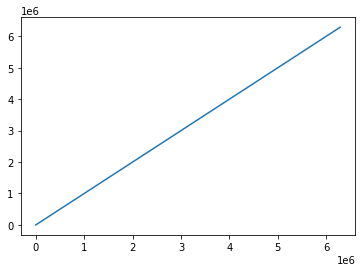

In [41]:
sns.lineplot(x = conds, y=difs, markers=True)